# **Preprocessing of Data: Music Genre Classification**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('train.csv')
categories = {'Acoustic/Folk': 0,
              'AltMusic': 1,
              'Blues': 2,
              'Bollywood': 3,
              'Country': 4,
              'HipHop': 5,
              'Indie Alt': 6,
              'Instrumental': 7,
              'Metal': 8,
              'Pop': 9,
              'Rock': 10}
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [4]:
# Size
df.shape

(17996, 17)

### **Missing Values and Irrelevant Columns**

In [10]:
# Id Variables
print(df['Artist Name'].nunique())
print(df['Track Name'].nunique())

# Missing Values
print(df.isna().sum() / df.shape[0])

# Too many Artist Names and Tracks Names. Those variables cannot be used to predict the genre.
# Instrumentalness has a lot of missing values.

df.drop(columns = ['Artist Name', 'Track Name', 'instrumentalness'], inplace = True)

# Deleting rows with missing values
df_cleaned = df.dropna()
df_cleaned.isna().sum()

9149
15129
Artist Name           0.000000
Track Name            0.000000
Popularity            0.023783
danceability          0.000000
energy                0.000000
key                   0.111914
loudness              0.000000
mode                  0.000000
speechiness           0.000000
acousticness          0.000000
instrumentalness      0.243221
liveness              0.000000
valence               0.000000
tempo                 0.000000
duration_in min/ms    0.000000
time_signature        0.000000
Class                 0.000000
dtype: float64


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.0849,0.8990,134.071,234596.0,4,5
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.3940,0.7870,147.681,109667.0,4,6
3,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.1220,0.5690,107.033,173968.0,4,5
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.1720,0.0918,199.060,229960.0,4,10


### **Correlation Between Variables**

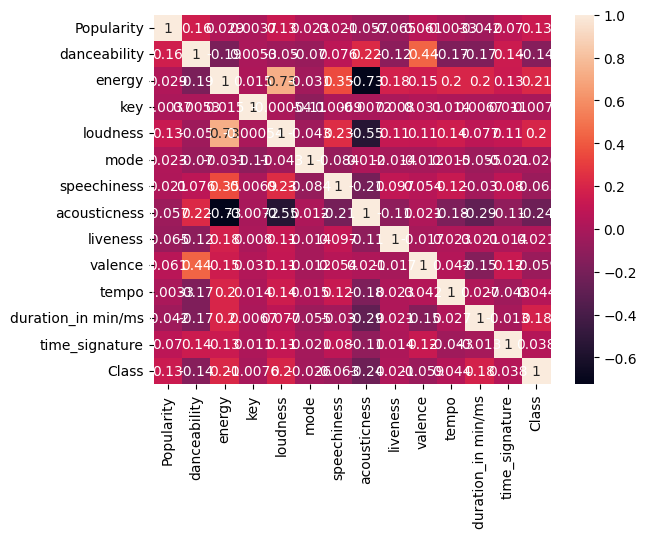

In [18]:
# Spearman
corr = df_cleaned.corr(method = 'spearman')
sns.heatmap(corr, annot = True)
plt.show()

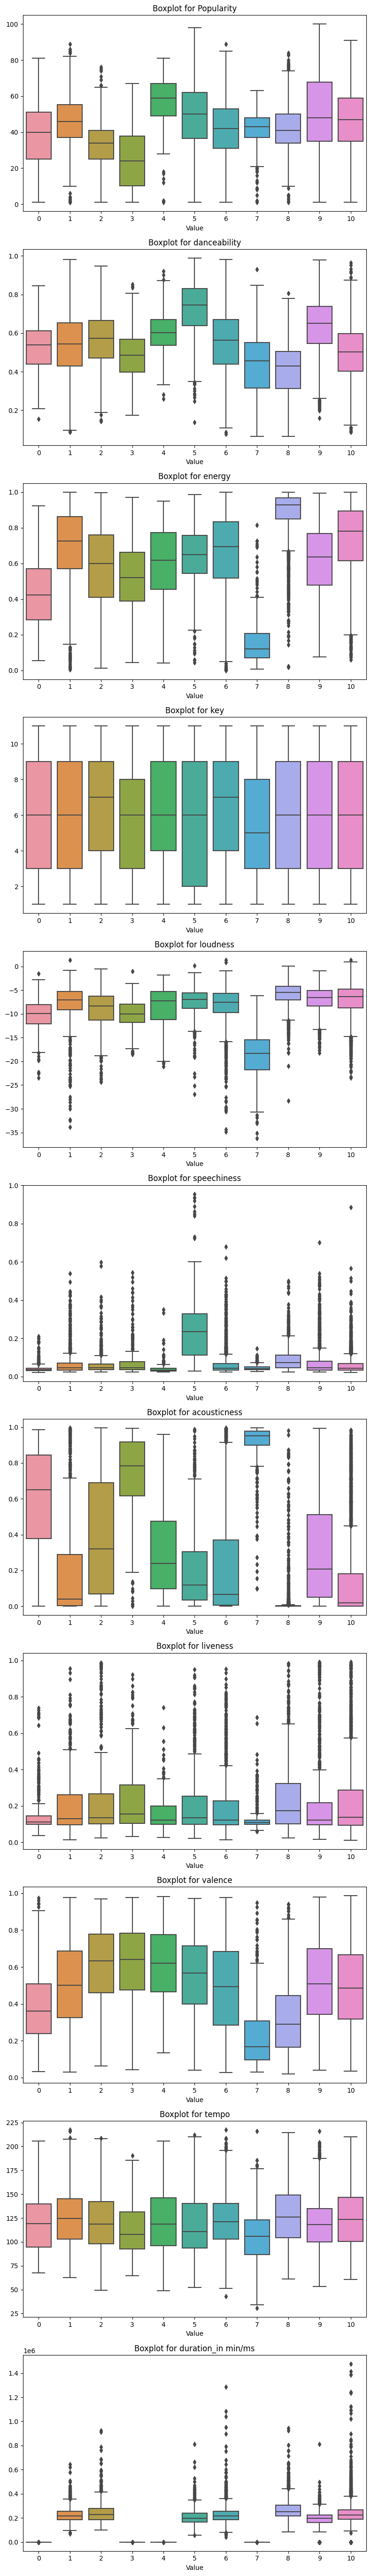

In [12]:
# Create a separate boxplot for each numerical value
num_values = 11
fig, axes = plt.subplots(nrows=num_values, figsize=(8, 5 * num_values))

columns = df_cleaned.select_dtypes(include='float64').columns
for i, col in enumerate(columns):
    sns.boxplot(data=df_cleaned, x='Class', y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [13]:
# Tempo and key have similar distribution across the categories, so well exclude them.
# Possible Complementary Analysis: ANOVA to study the real effect of each genre on variance.

df_cleaned.drop(columns=['tempo', 'key'], inplace = True)
df_cleaned.columns

<ipython-input-13-70ab1bb1761c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['tempo', 'key'], inplace = True)


Index(['Popularity', 'danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'liveness', 'valence',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

### **Data Transformation**

In [15]:
# Scaling the data with function of minmax scaling that returns a new dataframe
def minmax(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)

def minmax_scaling(dataframe):
    dataframe_scale = pd.DataFrame()

    for column in dataframe.columns:
        min_value = dataframe[column].min()
        max_value = dataframe[column].max()
        dataframe_scale[column] = dataframe[column].apply(lambda x: minmax(x, min_value, max_value))

    return dataframe_scale

df_scaled = minmax_scaling(df_cleaned)
df_scaled['Class'] = df_cleaned['Class']

df_scaled

,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,duration_in min/ms,time_signature,Class
0,0.595960,0.853991,0.563991,0.831803,1.0,0.027882,0.017169,0.074482,0.910096,0.158812,0.75,5
1,0.535354,0.343500,0.813996,0.771487,1.0,0.019410,0.001104,0.090909,0.569081,0.170413,0.75,10
2,0.343434,0.399740,0.613992,0.742101,1.0,0.032172,0.487952,0.389858,0.794358,0.074240,0.75,6
3,0.656566,0.852909,0.596992,0.790173,0.0,0.035389,0.021285,0.112335,0.569081,0.117769,0.75,5
4,0.525253,0.110967,0.974999,0.850036,1.0,0.207507,0.000170,0.163351,0.075953,0.155674,0.75,10
...,...,...,...,...,...,...,...,...,...,...,...,...
17991,0.343434,0.109885,0.108982,0.508771,0.0,0.020161,0.996988,0.088256,0.163997,0.130958,0.50,6
17992,0.262626,0.620376,0.222984,0.693125,0.0,0.011153,0.861446,0.059790,0.327271,0.174024,0.75,2
17993,0.333333,0.533852,0.981000,0.839282,0.0,0.052225,0.000030,0.667381,0.251834,0.146374,0.75,8
17994,0.282828,0.162881,0.804996,0.624371,0.0,0.119571,0.001295,0.249056,0.347938,0.148724,0.75,8


In [19]:
# Export final dataframe to csv file
df_scaled.to_csv('music_data.csv')